<a href="https://colab.research.google.com/github/YongjaeKwon0629/07_04/blob/main/07_04_mission01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

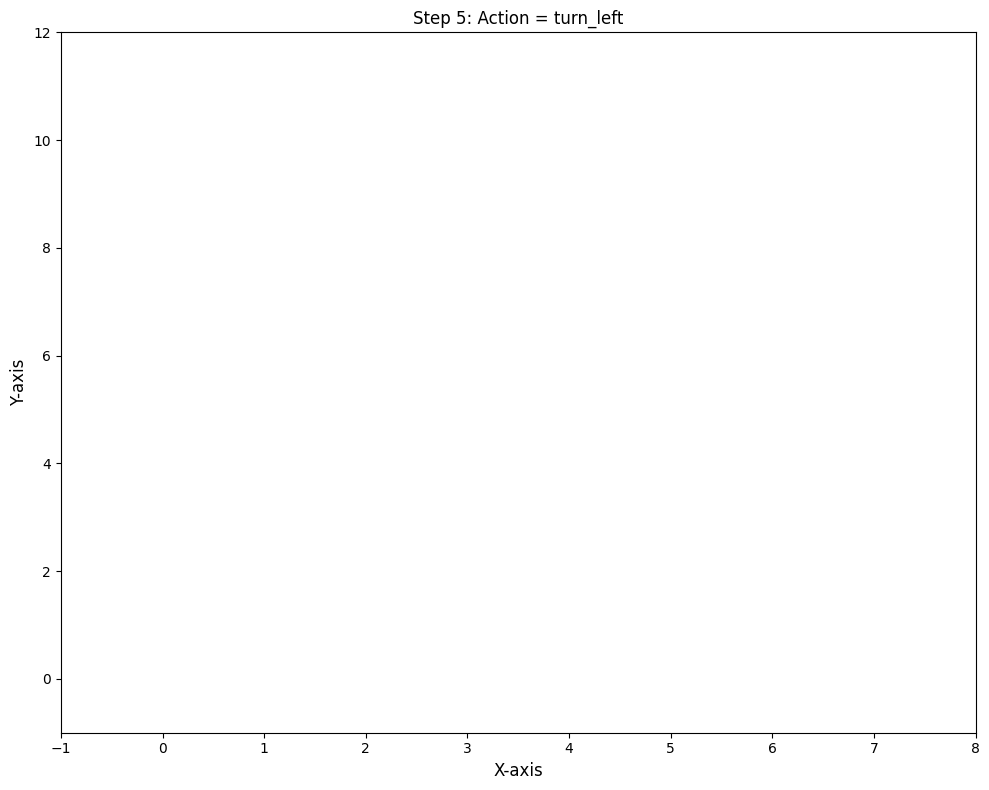

In [ ]:
import matplotlib.pyplot as plt

# 기본 플롯을 설정하는 함수 정의
# step_num: 현재 단계 번호 (기본값 1)
# action: 현재 수행 중인 동작 이름 (기본값 "forward")
def setup_basic_plot(step_num=1, action="forward"):
    # 1. figsize가 (10, 8)인 새로운 figure와 axes 객체 생성
    fig, ax = plt.subplots(figsize=(10, 8))

    # 2. X축 범위를 -1에서 8까지로 설정
    ax.set_xlim(-1, 8)

    # 3. Y축 범위를 -1에서 12까지로 설정
    ax.set_ylim(-1, 12)

    # 4. 그래프의 제목 설정, f-string을 사용하여 단계와 동작을 동적으로 표시
    ax.set_title(f"Step {step_num}: Action = {action}", fontsize=12)

    # 5. X축 라벨 설정, 글자 크기는 12로 지정
    ax.set_xlabel("X-axis", fontsize=12)

    # 6. Y축 라벨 설정, 글자 크기는 12로 지정
    ax.set_ylabel("Y-axis", fontsize=12)

    # 7. 레이아웃을 자동으로 조정하여 라벨들이 겹치지 않도록 설정
    plt.tight_layout()

    # 8. 화면에 그래프 출력
    plt.show()

    # 9. 호출한 곳에서 추가 작업을 할 수 있도록 ax 객체 반환
    return ax

# 스크립트를 직접 실행했을 때만 아래 코드 실행
if __name__ == "__main__":
    # step_num=5, action="turn_left"로 함수 호출하여 그래프 생성
    setup_basic_plot(5, "turn_left")

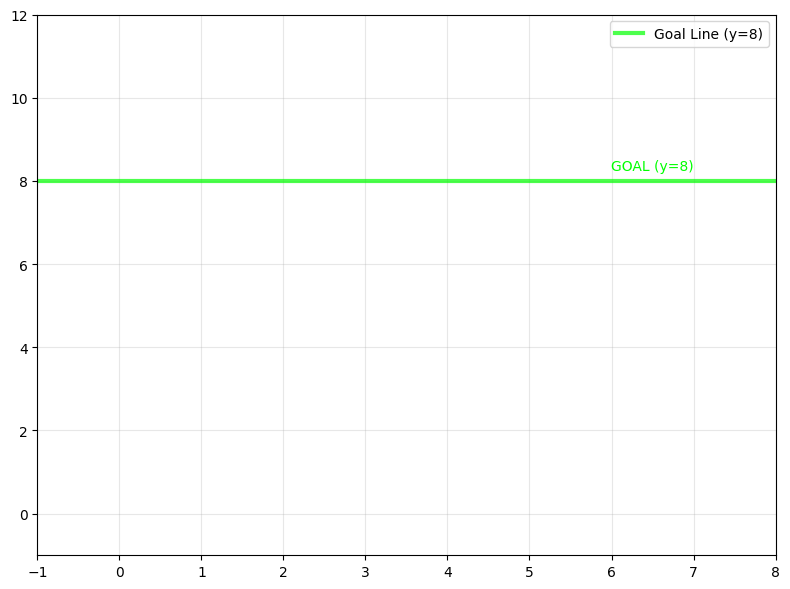

Returned goal_y: 8


In [ ]:
import matplotlib.pyplot as plt

# 목표선을 그리는 함수 정의
# obstacles: (x, y) 튜플로 이루어진 장애물들의 집합이나 리스트
def draw_goal_line(obstacles):
    # 1. 그림과 축 생성 (크기: 8x6)
    fig, ax = plt.subplots(figsize=(8, 6))

    # 2. 축 범위 설정
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)

    # 3. 그리드 표시 (투명도 0.3)
    ax.grid(True, alpha=0.3)

    # 4. 장애물이 있을 경우 가장 높은 y좌표 추출, 없으면 0
    max_y = max([y for _, y in obstacles]) if obstacles else 0

    # 5. 목표선 y좌표 = 가장 높은 y값 + 3
    goal_y = max_y + 3

    # 6. 초록색 수평선 그리기 (두께 3, 투명도 0.7)
    ax.axhline(y=goal_y, color='lime', linewidth=3, alpha=0.7, label=f"Goal Line (y={goal_y})")

    # 7. 목표선 텍스트 표시 (위쪽으로 약간 띄워서)
    ax.text(7, goal_y + 0.2, f"GOAL (y={goal_y})", color='lime',
            fontsize=10, ha='right', va='bottom')

    # 8. 범례 표시
    ax.legend()

    # 9. 레이아웃 자동 조정
    plt.tight_layout()

    # 10. 그래프 화면 출력
    plt.show()

    # 11. goal_y 값 반환
    return goal_y

# 직접 실행 시 테스트용 장애물로 함수 호출
if __name__ == "__main__":
    obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}  # 예시 장애물 좌표
    goal_y = draw_goal_line(obstacles)           # 함수 호출 및 반환값 저장
    print(f"Returned goal_y: {goal_y}")          # 결과 출력


Obstacle 1: 위치=(4, 5)
Obstacle 2: 위치=(3, 3)
Obstacle 3: 위치=(3, 2)
Obstacle 4: 위치=(2, 4)


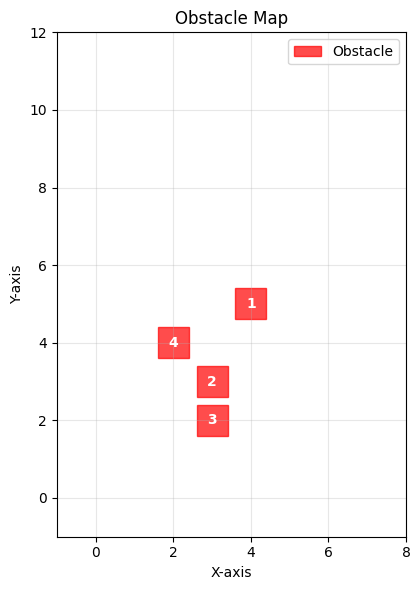

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# 장애물을 그리는 함수 정의
def draw_obstacles(obstacles):
    # 1. 입력이 set이면 list로 변환해서 순서 보장
    if isinstance(obstacles, set):
        obstacles = list(obstacles)

    # 2. 캔버스와 축 객체 생성 (크기: 8x6)
    fig, ax = plt.subplots(figsize=(8, 6))

    # 3. 축 범위 설정
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)

    # 4. 축 비율을 정사각형으로 설정 (x, y 비율 1:1)
    ax.set_aspect('equal')

    # 5. 격자 표시
    ax.grid(True, alpha=0.3)

    # 6. 라벨 표시
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_title("Obstacle Map")

    # 7. 장애물 하나씩 반복해서 그리기
    for i, (x, y) in enumerate(obstacles):
        # 중심 좌표에서 0.4씩 빼서 왼쪽 아래 모서리 좌표 계산
        rect = Rectangle((x - 0.4, y - 0.4), 0.8, 0.8,
                         color='red', alpha=0.7,
                         label="Obstacle" if i == 0 else "")  # 첫 장애물에만 범례용 label 추가

        # 사각형을 축에 추가
        ax.add_patch(rect)

        # 장애물 중앙에 번호 표시 (흰색, 굵은 글씨)
        ax.text(x, y, str(i + 1),
                color='white', fontsize=10, fontweight='bold',
                ha='center', va='center')

        # 콘솔에 정보 출력
        print(f"Obstacle {i + 1}: 위치=({x}, {y})")

    # 8. 범례 추가
    ax.legend()

    # 9. 레이아웃 자동 조정
    plt.tight_layout()

    # 10. 그래프 출력
    plt.show()

# 테스트 실행
if __name__ == "__main__":
    obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}  # 장애물 좌표 집합
    draw_obstacles(obstacles)                   # 함수 호출

Obstacle 1: 위치=(4, 5)
Obstacle 2: 위치=(3, 3)
Obstacle 3: 위치=(3, 2)
Obstacle 4: 위치=(2, 4)


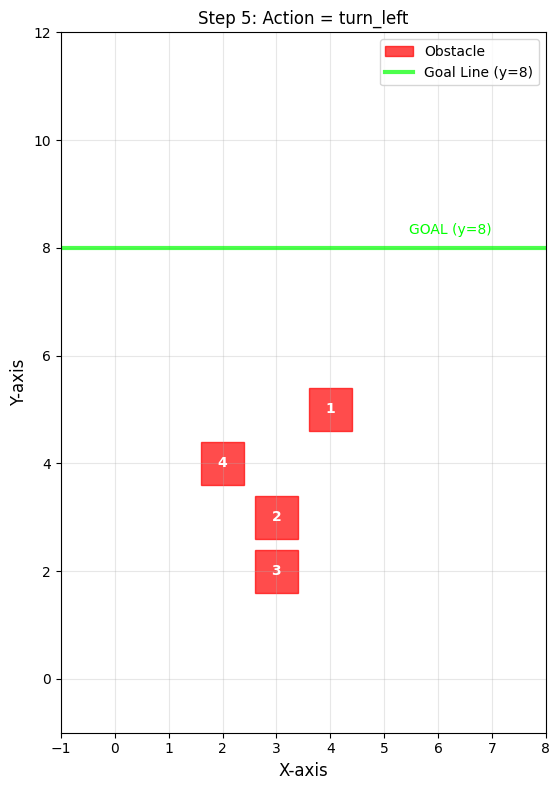

Returned goal_y: 8


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# 1. 기본 플롯 설정 함수
def setup_basic_plot(step_num=1, action="forward"):
    fig, ax = plt.subplots(figsize=(10, 8))  # 캔버스 크기 설정
    ax.set_xlim(-1, 8)                       # X축 범위
    ax.set_ylim(-1, 12)                      # Y축 범위
    ax.set_title(f"Step {step_num}: Action = {action}", fontsize=12)  # 동적 제목
    ax.set_xlabel("X-axis", fontsize=12)
    ax.set_ylabel("Y-axis", fontsize=12)
    plt.tight_layout()  # 레이아웃 자동 조정
    return ax           # ax 객체 반환

# 2. 목표선 그리기 함수
def draw_goal_line(ax, obstacles):
    # 장애물에서 Y좌표만 추출해 최대값 계산, 없으면 0
    max_y = max([y for _, y in obstacles]) if obstacles else 0
    goal_y = max_y + 3  # 목표선 위치

    # 초록색 수평선 추가
    ax.axhline(y=goal_y, color='lime', linewidth=3, alpha=0.7, label=f"Goal Line (y={goal_y})")

    # 텍스트로 목표선 위치 표시
    ax.text(7, goal_y + 0.2, f"GOAL (y={goal_y})",
            color='lime', fontsize=10, ha='right', va='bottom')

    # 범례 추가
    ax.legend()

    return goal_y  # 목표선 높이 반환

# 3. 장애물 그리기 함수
def draw_obstacles(ax, obstacles):
    # set인 경우 list로 변환하여 순서 고정
    if isinstance(obstacles, set):
        obstacles = list(obstacles)

    # 정사각형 비율 유지 및 그리드
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)

    # 제목 중복 방지용 기본 제목이 없을 경우만 설정
    if not ax.get_title():
        ax.set_title("Obstacle Map")

    for i, (x, y) in enumerate(obstacles):
        # 장애물 사각형 설정
        rect = Rectangle((x - 0.4, y - 0.4), 0.8, 0.8,
                         color='red', alpha=0.7,
                         label="Obstacle" if i == 0 else "")
        ax.add_patch(rect)  # 축에 추가

        # 중앙에 번호 표시
        ax.text(x, y, str(i + 1), color='white', fontsize=10, fontweight='bold',
                ha='center', va='center')

        # 콘솔 출력
        print(f"Obstacle {i + 1}: 위치=({x}, {y})")

# 실행 블록
if __name__ == "__main__":
    # 예시 장애물 데이터
    obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}

    # 1. 기본 플롯 생성
    ax = setup_basic_plot(step_num=5, action="turn_left")

    # 2. 장애물 시각화
    draw_obstacles(ax, obstacles)

    # 3. 목표선 표시
    goal_y = draw_goal_line(ax, obstacles)

    # 4. 최종 출력
    plt.show()

    # 5. 목표선 높이 콘솔 출력
    print(f"Returned goal_y: {goal_y}")

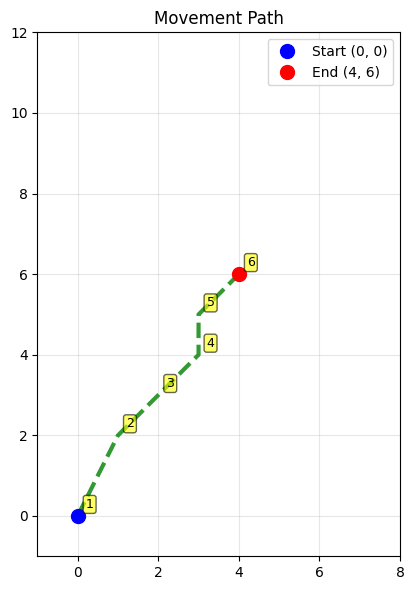

In [ ]:
import matplotlib.pyplot as plt

# 이동 경로를 시각화하는 함수
def draw_path(path):
    # 1. 캔버스와 축 생성 (크기 8x6)
    fig, ax = plt.subplots(figsize=(8, 6))

    # 2. 축 범위 설정 (임의 지정 가능, 예시 기준)
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)

    # 3. 정사각형 비율 유지
    ax.set_aspect('equal')

    # 4. 격자 표시
    ax.grid(True, alpha=0.3)

    # 5. 제목 설정
    ax.set_title("Movement Path")

    # 6. 경로가 두 점 이상일 경우만 선 그리기
    if len(path) >= 2:
        # x, y 좌표 분리 (리스트 컴프리헨션 사용)
        path_x = [x for x, _ in path]
        path_y = [y for _, y in path]

        # 초록 점선 경로 그리기
        ax.plot(path_x, path_y, 'g--', linewidth=3, alpha=0.8)

    # 7. 시작점 그리기 (파란색 원)
    if len(path) >= 1:
        start_x, start_y = path[0]
        ax.plot(start_x, start_y, 'bo', markersize=10, label=f"Start ({start_x}, {start_y})")

    # 8. 끝점 그리기 (빨간색 원)
    if len(path) >= 1:
        end_x, end_y = path[-1]
        ax.plot(end_x, end_y, 'ro', markersize=10, label=f"End ({end_x}, {end_y})")

    # 9. 각 좌표 위에 번호 표시
    for idx, (x, y) in enumerate(path):
        ax.text(x + 0.2, y + 0.2, str(idx + 1),
                fontsize=9, color='black',
                bbox=dict(facecolor='yellow', boxstyle='round,pad=0.2', alpha=0.6))

    # 10. 범례 추가
    ax.legend()

    # 11. 레이아웃 최적화
    plt.tight_layout()

    # 12. 결과 출력
    plt.show()

# 테스트 실행
if __name__ == "__main__":
    # 예시 경로
    path = [(0, 0), (1, 2), (2, 3), (3, 4), (3, 5), (4, 6)]
    draw_path(path)

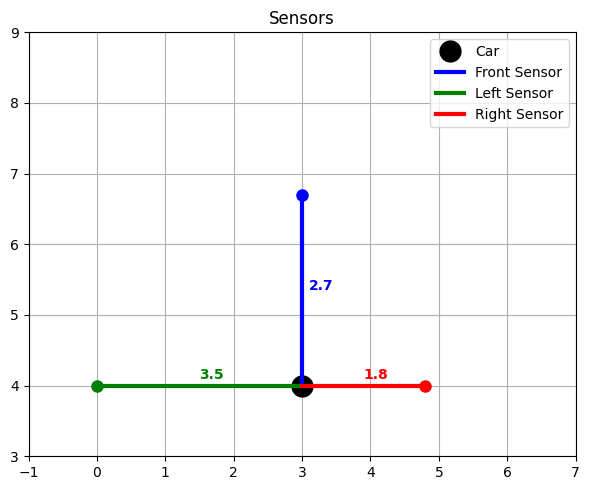

In [ ]:
import matplotlib.pyplot as plt

# 센서를 시각화하는 함수 정의
def draw_sensors(x, y, sensors):
    # 1. 최대 센서 거리 제한
    sensor_length = 3

    # 2. 캔버스 및 축 생성
    fig, ax = plt.subplots(figsize=(6, 5))

    # 3. 격자 및 제목 설정
    ax.grid(True)
    ax.set_title("Sensors")

    # 4. 축 범위 설정 (보기 좋게 넉넉히 설정)
    ax.set_xlim(x - 4, x + 4)
    ax.set_ylim(y - 1, y + 5)

    # 5. 차량의 현재 위치 표시 (검은색 원)
    ax.plot(x, y, 'ko', markersize=15, label="Car")

    # 6. 전방 센서
    front_reach = min(sensors.get('front', 0), sensor_length)
    ax.plot([x, x], [y, y + front_reach], 'b-', linewidth=3, label="Front Sensor")
    ax.plot(x, y + front_reach, 'bo', markersize=8)  # 끝점 원
    ax.text(x + 0.1, y + front_reach / 2, f'{sensors["front"]:.1f}', color='blue', fontweight='bold')

    # 7. 좌측 센서
    left_reach = min(sensors.get('left', 0), sensor_length)
    ax.plot([x, x - left_reach], [y, y], 'g-', linewidth=3, label="Left Sensor")
    ax.plot(x - left_reach, y, 'go', markersize=8)
    ax.text(x - left_reach / 2, y + 0.1, f'{sensors["left"]:.1f}', color='green', fontweight='bold')

    # 8. 우측 센서
    right_reach = min(sensors.get('right', 0), sensor_length)
    ax.plot([x, x + right_reach], [y, y], 'r-', linewidth=3, label="Right Sensor")
    ax.plot(x + right_reach, y, 'ro', markersize=8)
    ax.text(x + right_reach / 2, y + 0.1, f'{sensors["right"]:.1f}', color='red', fontweight='bold')

    # 9. 범례 및 레이아웃 조정
    ax.legend()
    plt.tight_layout()

    # 10. 결과 출력
    plt.show()

# 테스트 실행
if __name__ == "__main__":
    # 차량 위치
    x, y = 3, 4

    # 센서 거리 (front, left, right)
    sensors = {'front': 2.7, 'left': 3.5, 'right': 1.8}

    # 함수 호출
    draw_sensors(x, y, sensors)


Obstacle 1: 위치=(4, 5)
Obstacle 2: 위치=(3, 3)
Obstacle 3: 위치=(3, 2)
Obstacle 4: 위치=(2, 4)


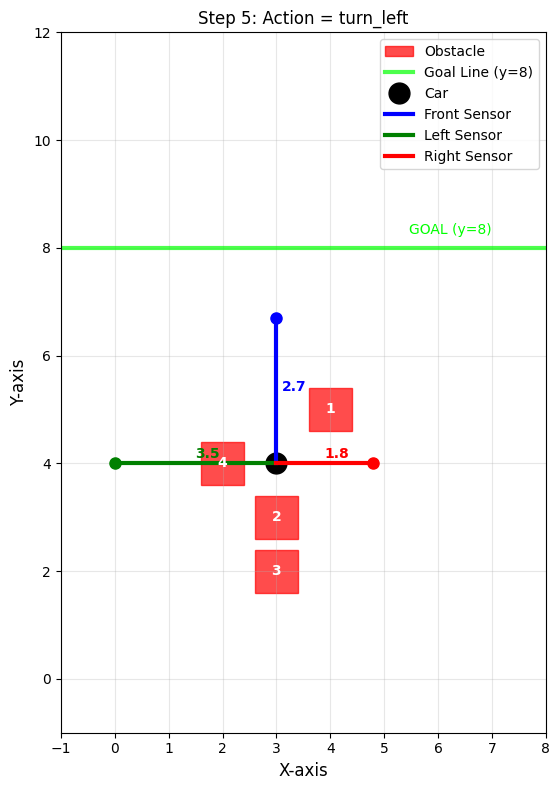

Returned goal_y: 8


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# 1. 기본 플롯 설정 함수
def setup_basic_plot(step_num=1, action="forward"):
    fig, ax = plt.subplots(figsize=(10, 8))  # 캔버스 크기 설정
    ax.set_xlim(-1, 8)                       # X축 범위
    ax.set_ylim(-1, 12)                      # Y축 범위
    ax.set_title(f"Step {step_num}: Action = {action}", fontsize=12)  # 동적 제목
    ax.set_xlabel("X-axis", fontsize=12)
    ax.set_ylabel("Y-axis", fontsize=12)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()  # 레이아웃 자동 조정
    return ax           # ax 객체 반환

# 2. 목표선 그리기 함수
def draw_goal_line(ax, obstacles):
    max_y = max([y for _, y in obstacles]) if obstacles else 0
    goal_y = max_y + 3

    ax.axhline(y=goal_y, color='lime', linewidth=3, alpha=0.7, label=f"Goal Line (y={goal_y})")
    ax.text(7, goal_y + 0.2, f"GOAL (y={goal_y})",
            color='lime', fontsize=10, ha='right', va='bottom')
    ax.legend()
    return goal_y

# 3. 장애물 그리기 함수
def draw_obstacles(ax, obstacles):
    if isinstance(obstacles, set):
        obstacles = list(obstacles)

    for i, (x, y) in enumerate(obstacles):
        rect = Rectangle((x - 0.4, y - 0.4), 0.8, 0.8,
                         color='red', alpha=0.7,
                         label="Obstacle" if i == 0 else "")
        ax.add_patch(rect)
        ax.text(x, y, str(i + 1), color='white', fontsize=10, fontweight='bold',
                ha='center', va='center')
        print(f"Obstacle {i + 1}: 위치=({x}, {y})")

# 4. 센서 빔 그리기 함수
def draw_sensors(ax, x, y, sensors):
    sensor_length = 3  # 최대 센서 길이

    # 차량 위치 표시
    ax.plot(x, y, 'ko', markersize=15, label="Car")

    # 전방 센서
    front_reach = min(sensors.get('front', 0), sensor_length)
    ax.plot([x, x], [y, y + front_reach], 'b-', linewidth=3, label="Front Sensor")
    ax.plot(x, y + front_reach, 'bo', markersize=8)
    ax.text(x + 0.1, y + front_reach / 2, f'{sensors["front"]:.1f}', color='blue', fontweight='bold')

    # 좌측 센서
    left_reach = min(sensors.get('left', 0), sensor_length)
    ax.plot([x, x - left_reach], [y, y], 'g-', linewidth=3, label="Left Sensor")
    ax.plot(x - left_reach, y, 'go', markersize=8)
    ax.text(x - left_reach / 2, y + 0.1, f'{sensors["left"]:.1f}', color='green', fontweight='bold')

    # 우측 센서
    right_reach = min(sensors.get('right', 0), sensor_length)
    ax.plot([x, x + right_reach], [y, y], 'r-', linewidth=3, label="Right Sensor")
    ax.plot(x + right_reach, y, 'ro', markersize=8)
    ax.text(x + right_reach / 2, y + 0.1, f'{sensors["right"]:.1f}', color='red', fontweight='bold')

    ax.legend()

# 실행 블록
if __name__ == "__main__":
    # 1. 예시 장애물 데이터
    obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}

    # 2. 차량 위치 및 센서 정보
    car_x, car_y = 3, 4
    sensors = {'front': 2.7, 'left': 3.5, 'right': 1.8}

    # 3. 플롯 생성
    ax = setup_basic_plot(step_num=5, action="turn_left")

    # 4. 장애물, 센서, 목표선 시각화
    draw_obstacles(ax, obstacles)
    goal_y = draw_goal_line(ax, obstacles)
    draw_sensors(ax, car_x, car_y, sensors)

    # 5. 플롯 출력
    plt.show()

    # 6. 목표선 콘솔 출력
    print(f"Returned goal_y: {goal_y}")
